# Task 2: Develop Time Series Forecasting Models
- Train and Forecast SPY asset


**Model Selection**

Given the options of traditional statistical models (ARIMA, SARIMA) and a deep learning model (LSTM) for time series forecasting,

First, import required libraries and script modules

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor
from model_training import ModelTrainer
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

**Loading the Data**

In [25]:
# Initialize class instances
path = '../data/'
processor = DataPreprocessor(data_dir = path, logger=logger)

# Load the data
tsla_data = processor.load_data('SPY')


**Prepare the data for Modeling**

In [26]:
# Create trainer instance of ModelTrainer
trainer = ModelTrainer(tsla_data, logger=logger)
# Prepare the data for modeling
trainer.prepare_data()


INFO:logger:Data was in descending order. It has been sorted in ascending order.
INFO:logger:Data split: 2877 train, 720 test


**Step 1: Train the ARIMA Model**

- optimize the parameters with auto_arima

In [27]:
trainer.train_arima()

INFO:logger:Training ARIMA model


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18709.393, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18687.594, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18707.852, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18707.356, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18687.682, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-18703.871, Time=1.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-18703.936, Time=7.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-18710.598, Time=6.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-18705.438, Time=0.83 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-18722.693, Time=8.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-18708.547, Time=2.78 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-18705.653, Time=3.83 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-18719.722, Time=12.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-18704.197, Time=5.14 sec
 ARI

INFO:logger:ARIMA model trained with parameters: {'maxiter': 50, 'method': 'lbfgs', 'order': (4, 1, 2), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (0, 0, 0, 0), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': True}


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-18722.195, Time=2.11 sec

Best model:  ARIMA(4,1,2)(0,0,0)[0] intercept
Total fit time: 69.888 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2877
Model:               SARIMAX(4, 1, 2)   Log Likelihood                9369.347
Date:                Mon, 11 Nov 2024   AIC                         -18722.693
Time:                        10:55:24   BIC                         -18674.980
Sample:                    01-02-2015   HQIC                        -18705.494
                         - 11-17-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.000      1.347      0.178      -0.0

**Step 2: Train the SARIMA Model**

- optimize the parameters with auto_arima

In [28]:
trainer.train_sarima()

INFO:logger:Training SARIMA model


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=9.07 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-16504.801, Time=0.68 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-17385.050, Time=0.92 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=5.21 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-16528.837, Time=0.27 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-17788.836, Time=6.58 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=7.28 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=5.83 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-17763.218, Time=2.23 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-17786.852, Time=5.55 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-17786.408, Time=4.00 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-17788.230, Time=1.70 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-17784.856, Time=8.73 sec


INFO:logger:SARIMA model trained with parameters: {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 0), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (2, 1, 0, 5), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': False}


 ARIMA(1,1,0)(2,1,0)[5] intercept   : AIC=-17786.816, Time=9.19 sec

Best model:  ARIMA(1,1,0)(2,1,0)[5]          
Total fit time: 67.268 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2877
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 5)   Log Likelihood                8898.418
Date:                           Mon, 11 Nov 2024   AIC                         -17788.836
Time:                                   10:56:31   BIC                         -17764.986
Sample:                               01-02-2015   HQIC                        -17780.238
                                    - 11-17-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

**Step 3: Train LSTM model**

INFO:logger:Training LSTM model


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.0751 - val_loss: 0.0018
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 0

INFO:logger:LSTM model training completed


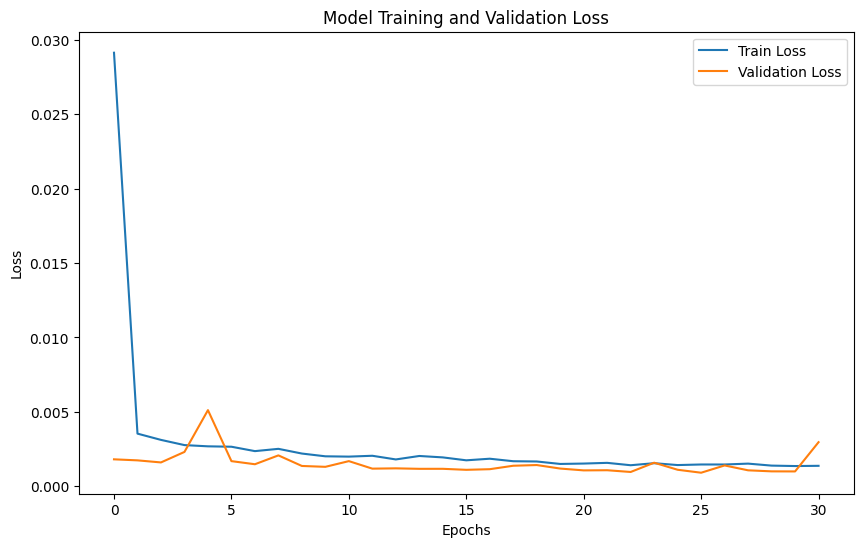

INFO:logger:Training history plotted successfully


In [29]:
trainer.train_lstm()

**Step 4: Make Predictions**

In [30]:
trainer.make_prediction()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

INFO:logger:Predictions generated for all models


**Step 5: Evaluate the models**

The models are evaluating using
- MAE, RSME, MAPE

In [31]:
trainer.evaluate_model()

INFO:logger:ARIMA - MAE: 0.17, RMSE: 0.22, MAPE: 14.76%
INFO:logger:SARIMA - MAE: 0.93, RMSE: 1.05, MAPE: 87.92%
INFO:logger:LSTM - MAE: 0.23, RMSE: 0.29, MAPE: 20.32%



Model Evaluation Metrics:
     Model       MAE      RMSE       MAPE
0   ARIMA  0.166364  0.216190  14.759188
1  SARIMA  0.929874  1.050843  87.919834
2    LSTM  0.228212  0.292261  20.319518


**Step 6: Compare the models**

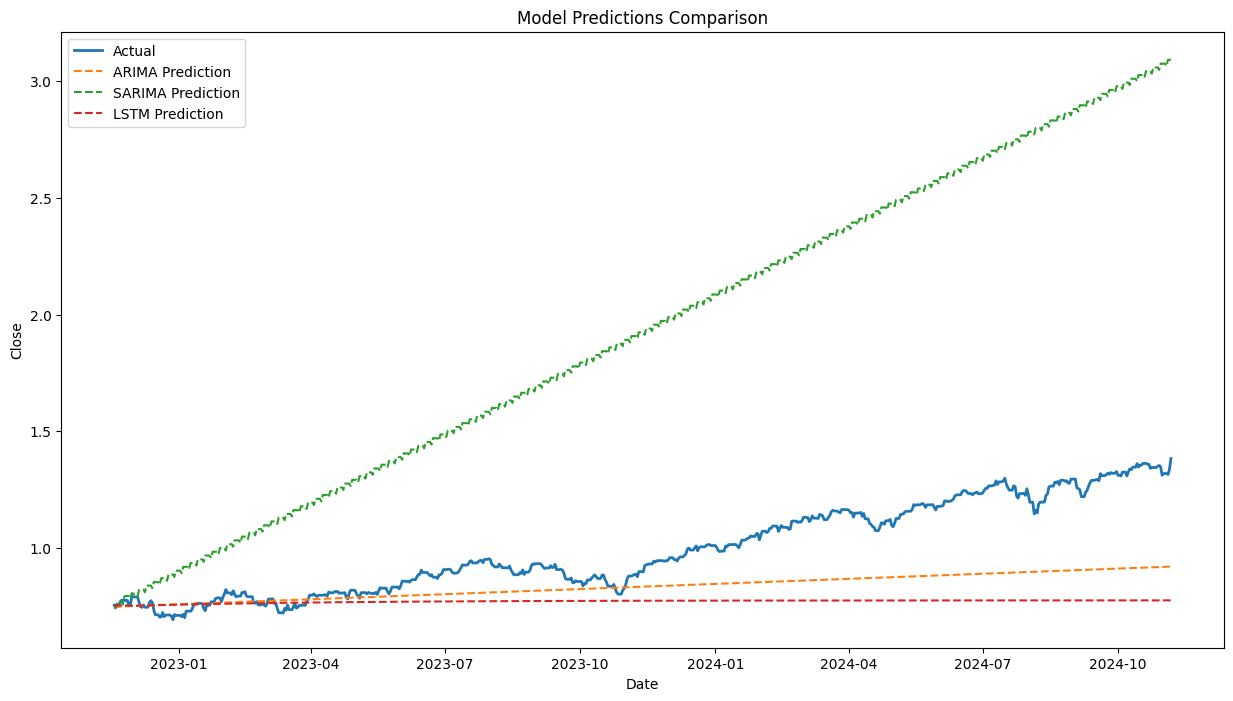

INFO:logger:Results plotted successfully


In [32]:
trainer.plot_result()

**Step 7: Forecast the next 6-12 months and save the forecast to csv with confidence interval**

In [33]:
# model_trainer.forecast(months=6, output_file='forecast_6_months.csv')
trainer.forecast(months=12, output_file='../data/spy_forecast_12_months.csv', best_model='LSTM')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

INFO:logger:Forecast results saved to data/spy_forecast_12_months.csv
